In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
##data preprocessing

In [6]:
data.shape

(7920, 3)

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
###text preprocessing

In [10]:
import re
import string

In [11]:
##convert to lowercase
data['tweet']=data['tweet'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [12]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [13]:
##REMOVE links
data['tweet']=data['tweet'].apply(lambda x:" ".join(re.sub(r'https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [14]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [15]:
##remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text
data['tweet']=data['tweet'].apply(remove_punctuations)

In [16]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red instagr...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app mobi...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [19]:
##remove numbers
data['tweet']=data['tweet'].str.replace('\d+','',regex=True)

<>:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\Nilanka\AppData\Local\Temp\ipykernel_1308\587516739.py:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  data['tweet']=data['tweet'].str.replace('\d+','',regex=True)


In [20]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red instagr...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app mobi...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [21]:
##remove stopwords
!pip install nltk

In [22]:
import nltk
nltk.download('stopwords',download_dir='../static/model/')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [23]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [24]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [25]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(x.lower() for x in x.split() if x not in sw) )

In [26]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [27]:
##stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [28]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [29]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [30]:
###building vocabulary

In [31]:
from collections import Counter
vocab=Counter()

In [32]:
for sentence in data['tweet']:
    ##print(sentence)
    vocab.update(sentence.split())

In [33]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 756,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 456,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 383,
         'io': 383,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 283,
         'got': 280,
         'fun': 277,
         'news': 265,
         'music': 264,
         'thank': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [34]:
len(vocab)

15904

In [35]:
tokens=[key for key in vocab if vocab[key]>10]

In [36]:
len(tokens)

1146

In [37]:
def save_vocabulary(lines,filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens,'../static/model/vocabulary.txt')

divide dataset


In [38]:
X=data['tweet']
y=data['label']

In [39]:
!pip install scikit-learn

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
###vectorization

In [42]:
def vectorizer(ds,vocabulary):
    vectorized_list=[]

    for sentence in ds:
        sentence_list=np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i]=1

        vectorized_list.append(sentence_list)

    vectorized_list_new=np.asarray(vectorized_list,dtype=np.float32)

    return vectorized_list_new

        

In [43]:
vectorized_x_train=vectorizer(x_train,vocab)

In [44]:
vectorized_x_test=vectorizer(x_test,vocab)

In [45]:
##check data balance
y_train.value_counts()

label
0    4718
1    1618
Name: count, dtype: int64

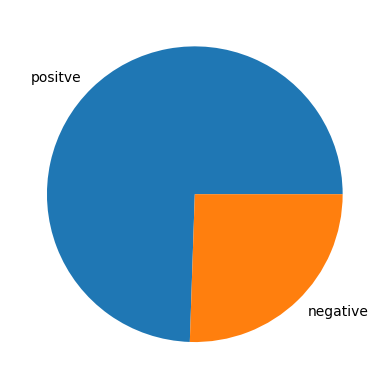

In [46]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['positve','negative'])
plt.show()

In [47]:
!pip install imbalanced-learn

handle imbalance dataset

In [48]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_x_train_smote,y_train_smote=smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9436, 15904) (9436,)


In [49]:
y_train_smote.value_counts()

label
0    4718
1    4718
Name: count, dtype: int64

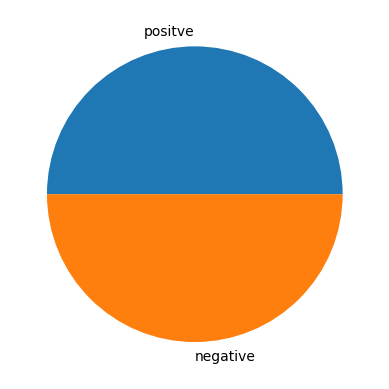

In [50]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=['positve','negative'])
plt.show()

model traning

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [52]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def traning_scores(y_act,y_pred):
    acc=round(accuracy_score(y_act,y_pred),3)
    pr=round(precision_score(y_act,y_pred,average='weighted',zero_division=0),3)
    rec=round(recall_score(y_act,y_pred,average='weighted',zero_division=0),3)
    f1=round(f1_score(y_act,y_pred,average='weighted',zero_division=0),3)
    print(f'Training scores:\n\tAccuracy={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tF1-score={f1}')
def validation_scores(y_act,y_pred):
    acc=round(accuracy_score(y_act,y_pred),3)
    pr=round(precision_score(y_act,y_pred,average='weighted',zero_division=0),3)
    rec=round(recall_score(y_act,y_pred,average='weighted',zero_division=0),3)
    f1=round(f1_score(y_act,y_pred,average='weighted',zero_division=0),3)
    print(f'Training scores:\n\tAccuracy={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tF1-score={f1}')


In [53]:
##logistic regression

In [54]:
lr=LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=lr.predict(vectorized_x_train_smote)
traning_scores(y_train_smote,y_train_pred)
y_test_pred=lr.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training scores:
	Accuracy=0.5
	Precision=0.25
	Recall=0.5
	F1-score=0.333
Training scores:
	Accuracy=0.742
	Precision=0.551
	Recall=0.742
	F1-score=0.633


In [55]:
##naive bayes

In [56]:
nb=MultinomialNB()
nb.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=nb.predict(vectorized_x_train_smote)
traning_scores(y_train_smote,y_train_pred)
y_test_pred=nb.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training scores:
	Accuracy=0.5
	Precision=0.25
	Recall=0.5
	F1-score=0.333
Training scores:
	Accuracy=0.742
	Precision=0.551
	Recall=0.742
	F1-score=0.633


In [57]:
##DecisionTreeClassifier

In [58]:
dtc=DecisionTreeClassifier()
dtc.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=dtc.predict(vectorized_x_train_smote)
traning_scores(y_train_smote,y_train_pred)
y_test_pred=dtc.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training scores:
	Accuracy=0.5
	Precision=0.25
	Recall=0.5
	F1-score=0.333
Training scores:
	Accuracy=0.742
	Precision=0.551
	Recall=0.742
	F1-score=0.633


In [59]:
##RandomForestClassifier

In [60]:
rf=RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=rf.predict(vectorized_x_train_smote)
traning_scores(y_train_smote,y_train_pred)
y_test_pred=rf.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training scores:
	Accuracy=0.5
	Precision=0.25
	Recall=0.5
	F1-score=0.333
Training scores:
	Accuracy=0.258
	Precision=0.066
	Recall=0.258
	F1-score=0.106


In [61]:
###svm

svm=SVC()
svm.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=svm.predict(vectorized_x_train_smote)
traning_scores(y_train_smote,y_train_pred)
y_test_pred=svm.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

In [62]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)